In [21]:
import random
random.seed(42)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

sns.set()

df = pd.read_csv("concrete_data.csv",) 
df.columns = ['cement','blast_furnace_slag','fly_ash','water','superplasticizer','coarse_aggregate',
              'fine_aggregate','age','concrete_compressive_strength']
    
#exibir valores ausentes ou null
print(df.isnull().sum().sort_values(ascending=False)[:10])
print("Número de linhas e colunas no conjunto de treinamento:", df.shape)
attributes = list(df.columns)
#removendo valores nulos
df.dropna()

#preencher os nulos
df.fillna(df.mean(0))

#remover duplicados
df.drop_duplicates()


concrete_compressive_strength    0
age                              0
fine_aggregate                   0
coarse_aggregate                 0
superplasticizer                 0
water                            0
fly_ash                          0
blast_furnace_slag               0
cement                           0
dtype: int64
Número de linhas e colunas no conjunto de treinamento: (1030, 9)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


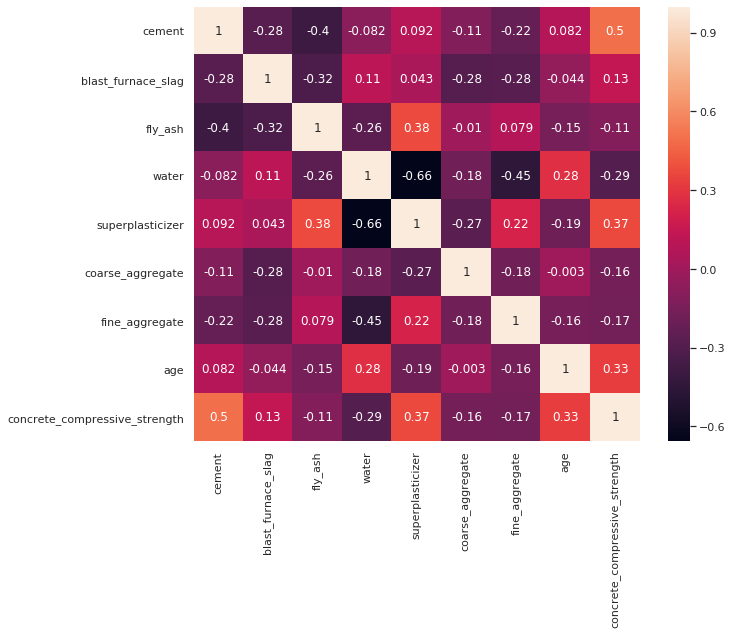

In [3]:
corr= df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True)

In [9]:
#REGRESSAO LINEAR MULTIPLA
y = df['cement']
x = np.column_stack((
    df['cement'],df['blast_furnace_slag'],df['fly_ash'],df['water'],df['superplasticizer'],
    df['coarse_aggregate'],df['fine_aggregate'],df['age'],df['concrete_compressive_strength']))  

x = sm.add_constant(x, prepend=True) 
res = sm.OLS(y,x).fit()

print(res.params)
print(res.bse)
print(res.summary())


const    2.930989e-12
x1       1.000000e+00
x2       1.461505e-15
x3       1.779826e-15
x4      -3.283832e-15
x5      -1.998401e-15
x6      -1.916869e-16
x7       4.987330e-16
x8      -8.283305e-16
x9      -1.802378e-15
dtype: float64
const    2.693902e-12
x1       9.400013e-16
x2       1.078176e-15
x3       1.304709e-15
x4       4.097250e-15
x5       9.508303e-15
x6       9.530802e-16
x7       1.085878e-15
x8       6.582569e-16
x9       3.170008e-15
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 cement   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.125e+30
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        02:20:22   Log-Likelihood:                 26950.
No. Observations:                1030   AIC:            